<a href="https://colab.research.google.com/github/GMZepeda/statistics-for-data-science-with-python/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El tipo de visualización que utilizamos depende del tipo de variable que intentamos analizar.

  - <ins>Variable Categórica</ins>: recuentos. Dividen los datgos en **grupos** o **categorías**
    - ej.: cuántos docentes son hombres y cuántos son mujeres.
    - graficos de barras o pastel


  - <ins>Variable Continua</ins>: pueden tomar valor infinitos dentro de un rango.
    - ej.: edad, altura, peso, salario.
    - graficos de dispersion, histogramas, promedios.
    
    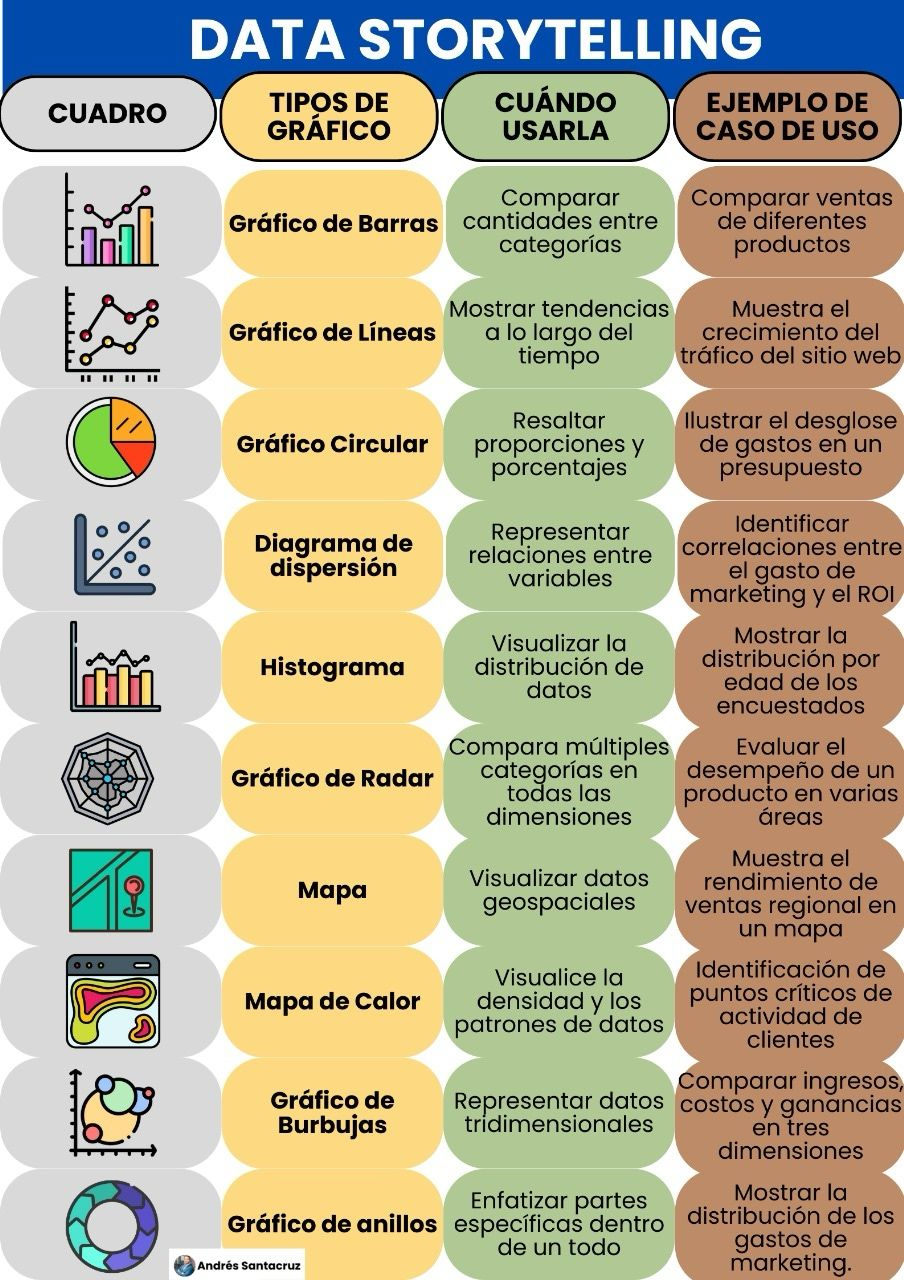


  

# **Estadística por grupos**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

- Identificar todos los casos duplicados usando la variable prof.

- Usando todas las observaciones, calcular el promedio y la desviación estándar de la edad.

- Repetir el análisis filtrando el conjunto de datos para incluir una sola observación por cada instructor, con un total de observaciones restringido a 94.

- Identificar todos los casos duplicados usando la variable prof – encontrar los valores únicos de la variable prof.


In [ ]:
# Devuelve un array de los valores únicos que tiene la variable 'prof'.
# Números de ID de cada prof.
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

In [ ]:
# devuelve la cantidad de valores únicos que tiene la variable 'prof'.
ratings_df.prof.nunique()

94

In [ ]:
ratings_df['age'].mean()

np.float64(48.365010799136066)

In [ ]:
ratings_df['age'].std()

9.802742037864821

In [ ]:
ratings_df.groupby('gender').agg({'eval':['mean', 'std', 'var'],'beauty':['mean', 'std', 'var'],'age':['mean', 'std', 'var']}).reset_index()

gender      eval                        beauty                     \
               mean       std       var      mean      std       var   
0  female  3.901026  0.538803  0.290308  0.116109  0.81781  0.668813   
1    male  4.069030  0.556652  0.309861 -0.084482  0.75713  0.573246   

         age                       
        mean       std        var  
0  45.092308  8.532031  72.795559  
1  50.746269  9.993396  99.867964

In [ ]:
ratings_df.groupby('tenure').agg({'eval':['mean', 'std', 'var'],'beauty':['mean', 'std', 'var'],'age':['mean', 'std', 'var']}).reset_index()

tenure      eval                        beauty                      \
              mean       std       var      mean       std       var   
0     no  4.133333  0.556747  0.309967  0.028359  0.876656  0.768525   
1    yes  3.960111  0.549104  0.301516 -0.008013  0.763074  0.582282   

         age                         
        mean        std         var  
0  50.186275   6.946372   48.252087  
1  47.850416  10.420056  108.577562

Estamos calculando los promedios de 463 cursos. Nos fijamos en la edad media o en la belleza, pero estos son los atributos de los profesores. A nuestros datos sabemos que sus 94 profesores han han impartido en conjunto 493 cursos. Es decir el mismo instructor que ha impartido varios cursos.
Por lo tanto, cuando calculamos la edad media con 463 cursos, NO ES NECESARIAMENTE la edad media de los profesores. Para evitar este problema, debemos SUBDIVIDIR los datos para eliminar los duplicados y tener solo una observación por instructor individual en el conjunto de datos. En lugar de 463 observaciones, deberíamos tener solo 94 observaciones.  

In [ ]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset=["prof"])

In [ ]:
no_duplicates_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         94 non-null     object 
 1   age              94 non-null     int64  
 2   gender           94 non-null     object 
 3   credits          94 non-null     object 
 4   beauty           94 non-null     float64
 5   eval             94 non-null     float64
 6   division         94 non-null     object 
 7   native           94 non-null     object 
 8   tenure           94 non-null     object 
 9   students         94 non-null     int64  
 10  allstudents      94 non-null     int64  
 11  prof             94 non-null     int64  
 12  PrimaryLast      94 non-null     int64  
 13  vismin           94 non-null     int64  
 14  female           94 non-null     int64  
 15  single_credit    94 non-null     int64  
 16  upper_division   94 non-null     int64  
 17  English_speaker  94 no

In [ ]:
no_duplicates_ratings_df.groupby("gender").agg({"beauty":["mean","std","var"],"age":["mean","std","var"]}).reset_index()

gender    beauty                            age                       
               mean       std       var       mean        std         var
0  female  0.252303  0.843667  0.711774  44.950000   8.935524   79.843590
1    male -0.033098  0.801559  0.642497  49.481481  10.813585  116.933613

**¿Los profesores que imparten cursos de un solo crédito obtienen calificaciones más altas?**

Text(0.5, 1.0, 'Cursos dictados por instructores hombre y mujeres')

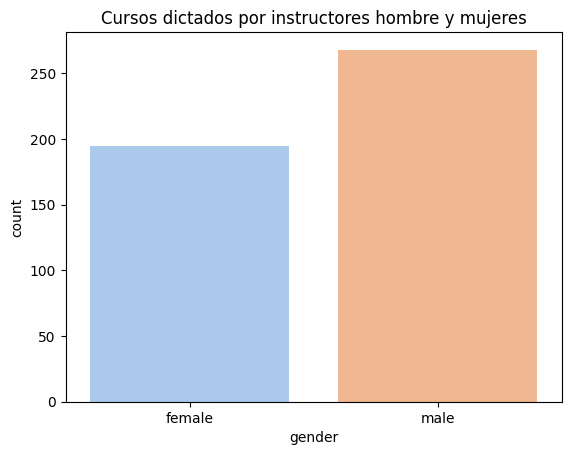

In [ ]:
ax = sns.countplot(x="gender", data=ratings_df, hue="gender", palette="pastel")
ax.set_title("Cursos dictados por instructores hombre y mujeres")

Text(0.5, 1.0, 'Cursos dictados por instructores hombre y mujeres')

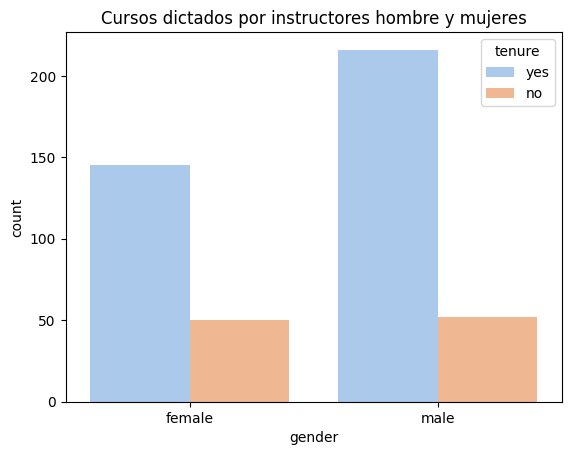

In [ ]:
ax = sns.countplot(x="gender", data=ratings_df, hue="tenure",palette="pastel")
ax.set_title("Cursos dictados por instructores hombre y mujeres")

Se añade la división por curso superior e inferior. Para ello usamos el argumento "row".

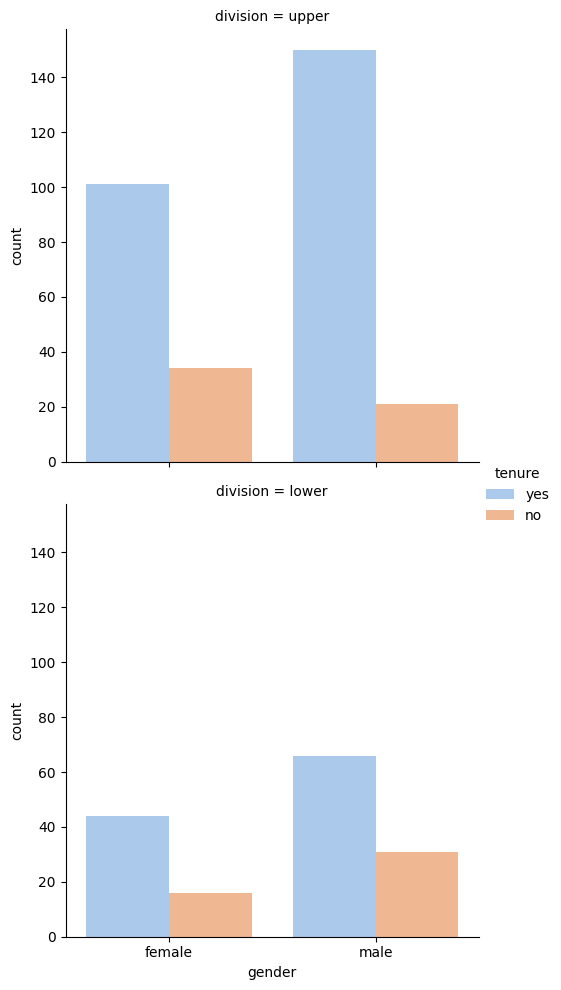

In [ ]:
ax = sns.catplot(x="gender", data= ratings_df, kind="count", hue="tenure", row="division", palette='pastel')

**Scatter Plots (diagrama de dispersión)**
Se usa cuando queremos ver la relación entre dos variables continuas. Y además es posible añadir variables categóricas como una dimensión adicional.



¿Afecta la edad a las evaluaciones de la enseñanza?
Continuas:
  - Edad (Age)
  - Puntajes de evaluación (Evaluation Scores)

Luego agregamos dos dimensiones adicionales:
CategoricasÑ
  - Género (Gender)
  - Tenencia (Tenure)

Evaluamos la edad y la enseñanza y le agregamos la dimensión categórica.
En el eje X tenemos la edad y en el eje y la evaluación docente.
El panel supeiror es para los profesores titulares y el de abajo para no titulares.

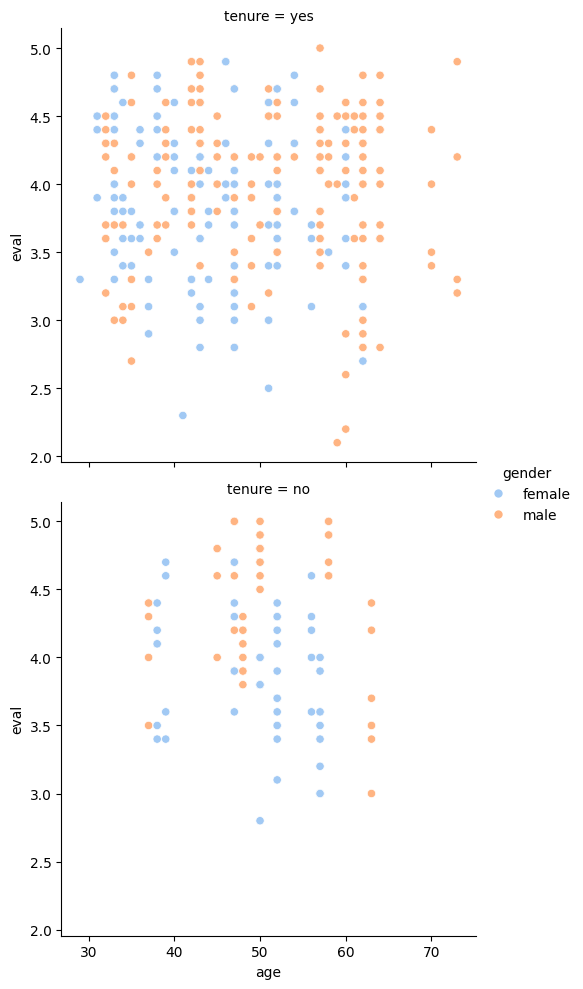

In [ ]:
g = sns.relplot(
    data=ratings_df,
    x="age", y="eval",
    hue="gender",
    row="tenure",
    kind="scatter",
    palette='pastel'
)

# **Graficos Estadísticos**

*   <ins>Distribución y varianza</ins>: Histograma.
*   <ins>Diagrama de caja</ins>: Muestra media, mediana, cuartiles y valores atípicos.




**Histograma simple - puntaje de evaluación de la enseñanza**
Es posible trazar varios histogramas (superpuestos) para ver las diferencias entres los grupos. Por ej: una evaluación por género sobre las calificaciones.


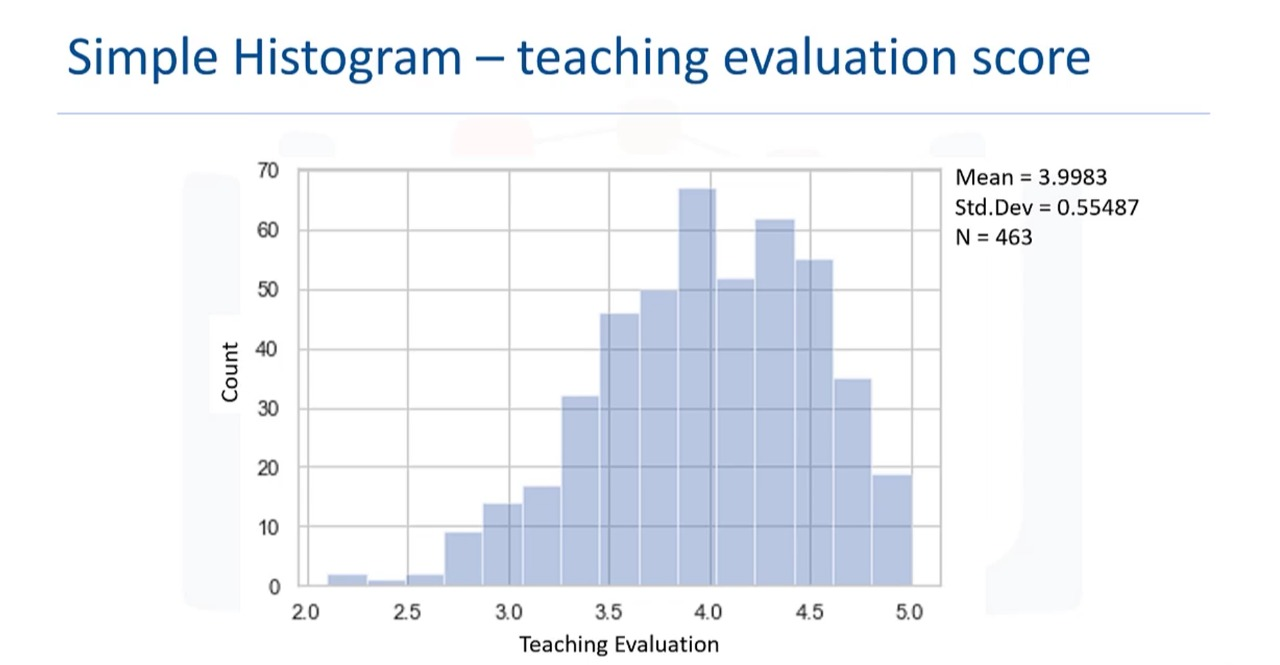
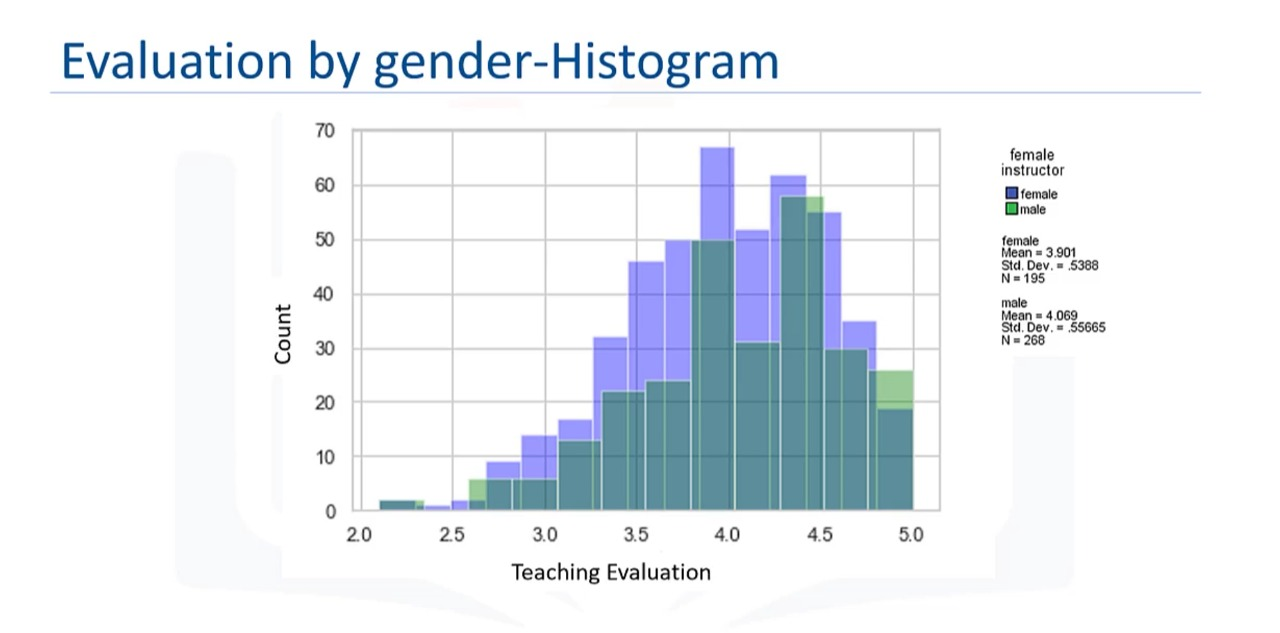





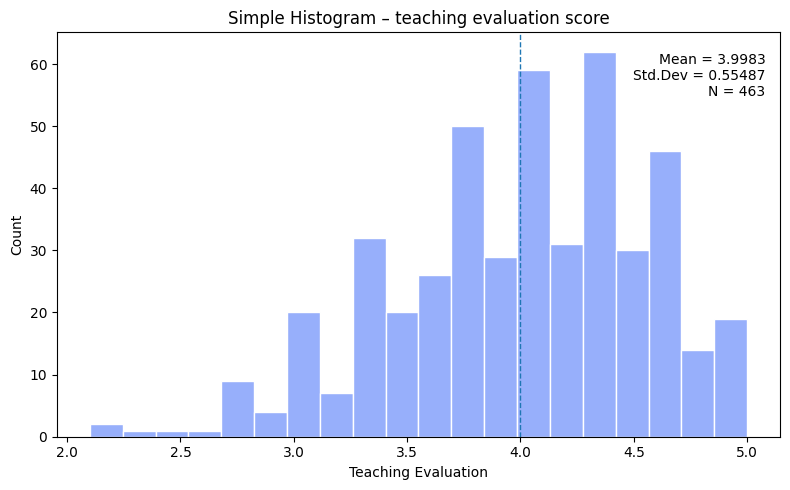

**Box plots**

La línea gruesa del cuadro representa la mediana.

La parte superior de la caja es el tercer cuatil.

La parte inferior de la caja es el primer cuartil.

La línea de la parte inferior es el valor mínimo.

La línea de la parte superior es el valor máximo.

El rango entre el primer cuartil y el tercer cuartil, se denomina **rango intercuartil**.


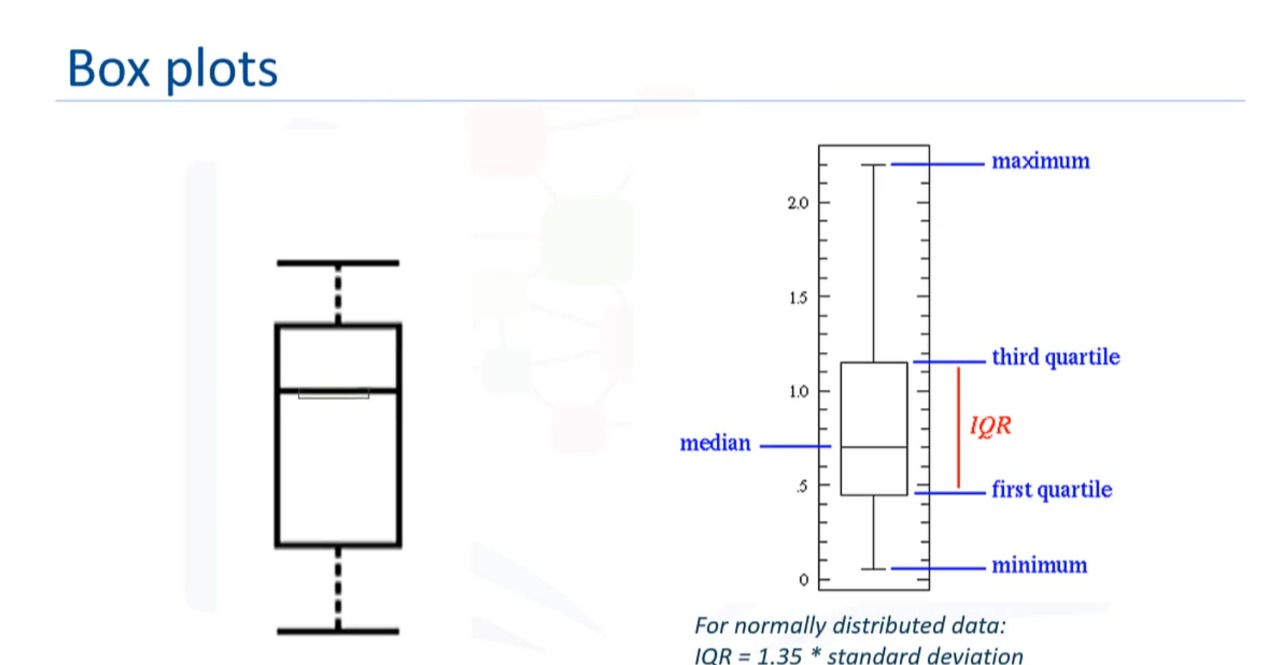

# CÓDIGO

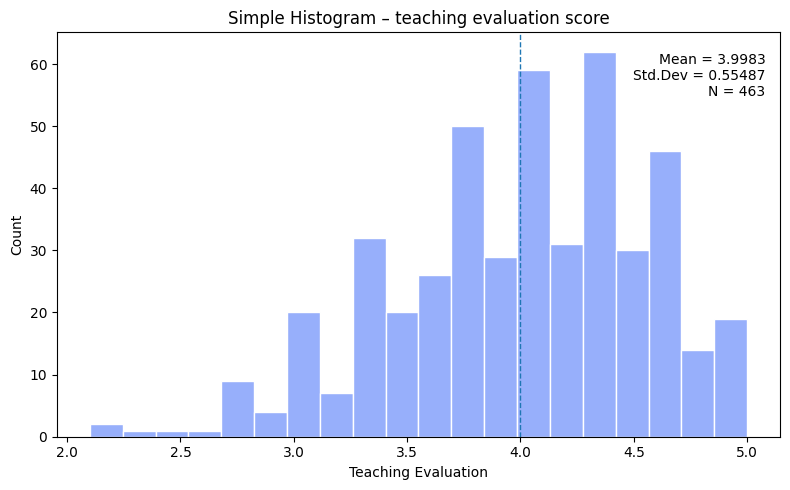

In [ ]:
# Histograma simple
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=ratings_df, x="eval", bins=20, kde=False, ax=ax, color="#6B8EFA", edgecolor="white", alpha=0.7)

# Etiquetas
ax.set_title("Simple Histogram – teaching evaluation score")
ax.set_xlabel("Teaching Evaluation")
ax.set_ylabel("Count")

# Estadísticos y anotación
m = ratings_df["eval"].mean()
s = ratings_df["eval"].std()
n = ratings_df["eval"].shape[0]

ax.text(0.98, 0.95, f"Mean = {m:.4f}\nStd.Dev = {s:.5f}\nN = {n}",
        transform=ax.transAxes, ha="right", va="top")

# (opcional) línea vertical en la media
ax.axvline(m, linestyle="--", linewidth=1)
plt.tight_layout()


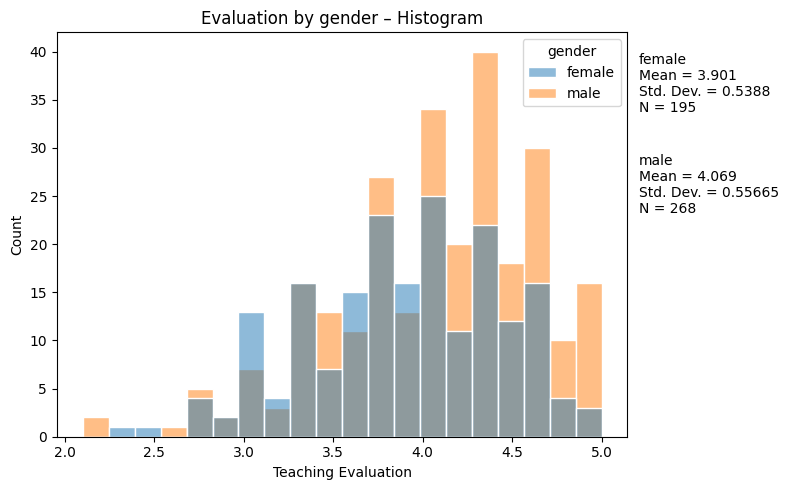

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# Histograma superpuesto por género
sns.histplot(data=ratings_df, x="eval", hue="gender", bins=20,
             stat="count", common_bins=True, element="bars",
             alpha=0.5, edgecolor="white", ax=ax)

ax.set_title("Evaluation by gender – Histogram")
ax.set_xlabel("Teaching Evaluation")
ax.set_ylabel("Count")

# Cálculo y anotación de stats por grupo
stats = (ratings_df
         .groupby("gender")["eval"]
         .agg(mean="mean", std="std", N="count")
         .round({"mean":3, "std":5}))

# Texto estilo del slide (una cajita por género)
y0 = 0.95
dy = 0.25
for i, (g, row) in enumerate(stats.iterrows()):
    txt = f"{g}\nMean = {row['mean']}\nStd. Dev. = {row['std']}\nN = {int(row['N'])}"
    ax.text(1.02, y0 - i*dy, txt, transform=ax.transAxes, va="top", ha="left")

plt.tight_layout()

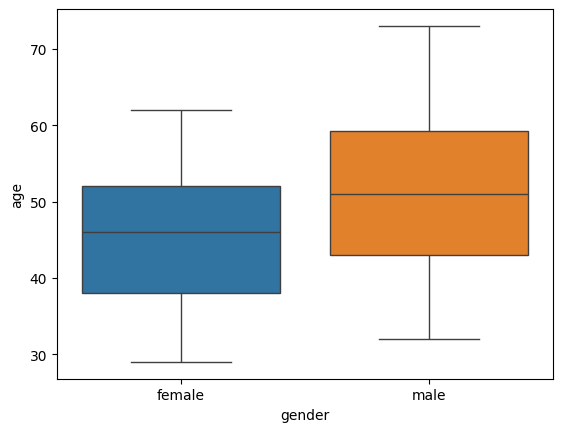

In [ ]:
ax = sns.boxplot(x='gender', y='age', data=ratings_df, hue='gender')

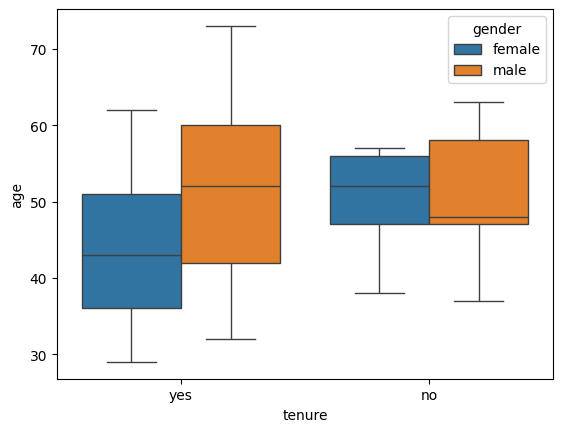

In [ ]:
# También podemos agregar otra dimensión. Aquí añadimos la tenencia (suplente o titular)
ax = sns.boxplot(x='tenure', y='age', hue='gender',
                 data=ratings_df)

**Gráfico Circular**

Números de cursos impartidos según el género.

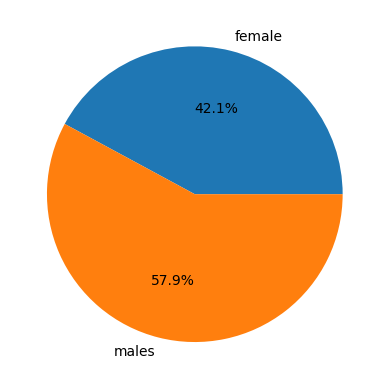

In [ ]:
labels = ['female', 'males']                                       # Primero especificamos las etiquetas
sizes = [ratings_df['gender'].value_counts()['female'],            # Obtenemos el número de cursos impartidos
         ratings_df['gender'].value_counts()['male']
        ]
figl, axl = plt.subplots()
# Creamos la figura (figl) y un eje (axl) donde vamos a dibujar el gráfico.
axl.pie(sizes, labels=labels, autopct='%1.1f%%')
# Dibujamos un gráfico de torta:
# - sizes → los valores (cantidad de cursos según género).
# - labels → las etiquetas que van a aparecer (female, males).
# - autopct='%1.1f%%' → muestra el porcentaje con 1 decimal y el símbolo %.

plt.show()
# Mostramos el gráfico en pantalla.

# Presentacion de los datos de evaluación de los profesores

- **Las evaluaciones de la enseñanza, por parte de los estudiantes, ¿está influidas por el aspecto de los profesores?**
- **Sus evaluaciones, ¿difieren según el sexo?**
- **Los instructores 'atractivos', ¿obtienen calificaciones de la enseñanza más altas?**



In [ ]:
#subset_ratings_df = ratings_df[['age','beauty','eval','students','allstudents']]
#subset_ratings_df.describe()
ratings_df[['age','beauty','eval','students','allstudents']].describe()


,age,beauty,eval,students,allstudents
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000


In [ ]:
ratings_df['native'].value_counts()

,count
native,
yes,435
no,28


In [ ]:
ratings_df['minority'].value_counts()

,count
minority,
no,399
yes,64


In [ ]:
ratings_df['gender'].value_counts()

,count
gender,
male,268
female,195


In [ ]:
ratings_df['tenure'].value_counts()

,count
tenure,
yes,361
no,102


# Aspecto de la distribución de los datos en bruto

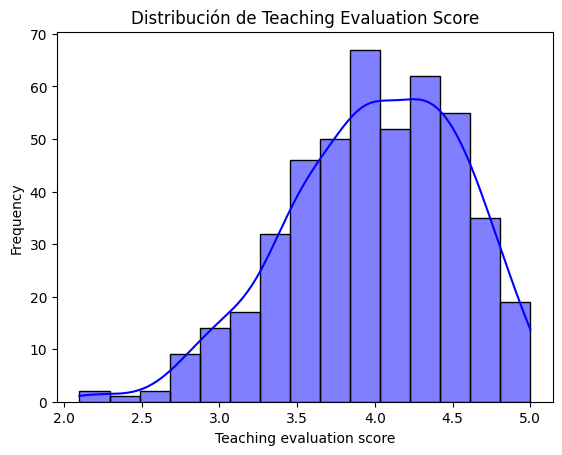

In [ ]:
# Histograma + curva de densidad (KDE) en una sola figura
sns.histplot(ratings_df['eval'], kde=True, color="blue")

plt.xlabel("Teaching evaluation score")
plt.ylabel("Frequency")
plt.title("Distribución de Teaching Evaluation Score")
plt.show()



KDE Kernel Density Estimation (estimación de Densidad por Núcleo): curva empírica → usa todos los datos.

Normal(μ,σ): curva teórica → solo usa media y desviación.


# Con los parámetros de la media la desviación típica utilizando una distribución Normal (Distribución Teórica).

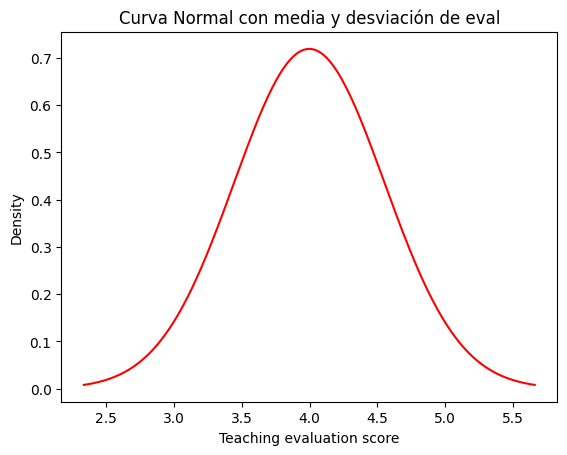

In [ ]:
data = ratings_df['eval']
mu = data.mean()
sigma = data.std()

# eje x extendido: desde mu - 3σ hasta mu + 3σ
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
normal_pdf = norm.pdf(x, mu, sigma)

plt.plot(x, normal_pdf, color="red")
plt.xlabel("Teaching evaluation score")
plt.ylabel("Density")
plt.title("Curva Normal con media y desviación de eval")
plt.show()



# Datos vs KDE vs Normal(μ,σ)

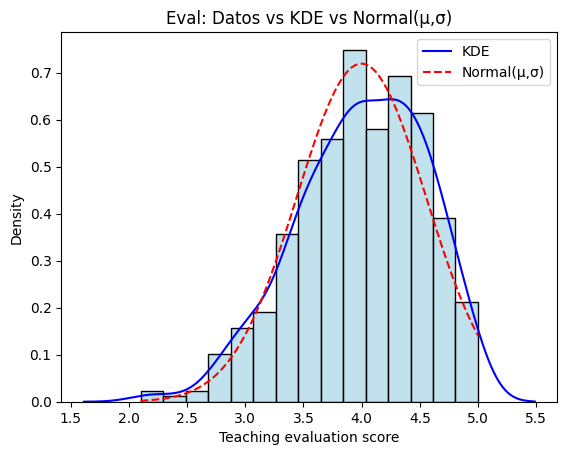

In [ ]:
# Datos
data = ratings_df['eval']

# Calcular media y desviación
mu = data.mean()
sigma = data.std()

# Crear rango de valores en el eje X
x = np.linspace(data.min(), data.max(), 100)

# Densidad de la normal teórica con mu y sigma
normal_pdf = norm.pdf(x, mu, sigma)

# Plotear histograma de los datos
sns.histplot(data, bins=15, stat="density", color="lightblue", edgecolor="black")

# Agregar KDE de los datos
sns.kdeplot(data, color="blue", label="KDE")

# Agregar curva normal teórica
plt.plot(x, normal_pdf, color="red", linestyle="--", label="Normal(μ,σ)")
plt.xlabel("Teaching evaluation score")
plt.ylabel("Density")
plt.title("Eval: Datos vs KDE vs Normal(μ,σ)")
plt.legend()
plt.show()